<a href="https://colab.research.google.com/github/AnanyaBurugupalli/Grade-Prediction/blob/main/Grade_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('student.csv')
print("Dataset Shape:", data.shape)

Dataset Shape: (395, 33)


In [ ]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,2.541399,22.291345,1,1,3,26.018269,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,7.571065,21.215663,1,1,3,24.199607,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,7.680922,15.438044,2,3,3,17.873831,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,13.621330,7.923995,1,1,5,7.158495,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,6.670907,15.639512,1,2,5,18.204129,6,10,10


In [ ]:
# Check for data types and missing values
print("\nData Types:")
print(data.dtypes)


Data Types:
school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime     float64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime      float64
goout         float64
Dalc            int64
Walc            int64
health          int64
absences      float64
G1              int64
G2              int64
G3              int64
dtype: object


In [ ]:
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101   15.537841    0.334177   
std      1.276043    1.094735    1.088201    0.697505    7.204265    0.743651   
min     15.000000    0.000000    0.000000    1.000000   -5.341463    0.000000   
25%     16.000000    2.000000    2.000000    1.000000   12.815154    0.000000   
50%     17.000000    3.000000    2.000000    1.000000   15.910753    0.000000   
75%     18.000000    4.000000    3.000000    2.000000   20.186584    0.000000   
max     22.000000    4.000000    4.000000    4.000000   31.802837    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304   10.356326   14.671751    1.481013    2.291139    3.554430   
st

In [ ]:
print("The following data are Null:")
print(data.isnull().sum())

The following data are Null:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


ONE-HOT ENCODING

In [ ]:
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [ ]:
outlier_indices = []
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].index
    outlier_indices.extend(outliers)
outlier_indices = list(set(outlier_indices))
print(outlier_indices) #This means that the data points in rows printed of your DataFrame have been identified as potential outliers.


[2, 18, 25, 27, 29, 37, 40, 44, 46, 47, 49, 52, 54, 60, 61, 66, 72, 76, 78, 79, 85, 88, 95, 100, 108, 111, 112, 113, 118, 127, 128, 130, 131, 134, 135, 136, 137, 138, 140, 141, 144, 146, 148, 149, 150, 151, 152, 153, 156, 157, 159, 160, 161, 162, 164, 165, 168, 170, 171, 173, 175, 184, 192, 198, 205, 206, 207, 211, 213, 216, 217, 221, 222, 223, 225, 228, 236, 238, 239, 240, 242, 244, 247, 248, 250, 252, 255, 259, 264, 269, 270, 278, 281, 292, 296, 299, 304, 305, 307, 308, 309, 310, 312, 313, 314, 315, 316, 327, 332, 333, 334, 336, 337, 340, 341, 343, 349, 350, 352, 353, 357, 361, 363, 367, 369, 370, 375, 376, 383, 384, 387, 389, 390, 391, 392]


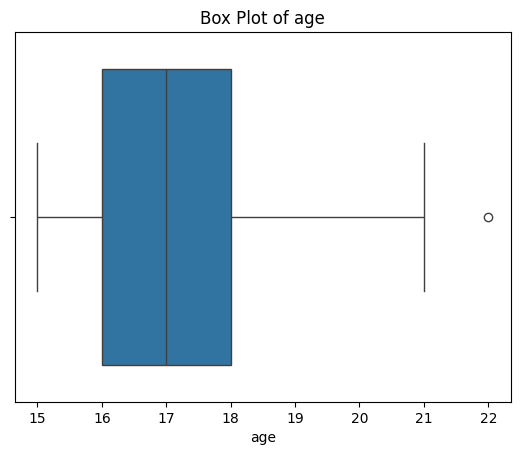

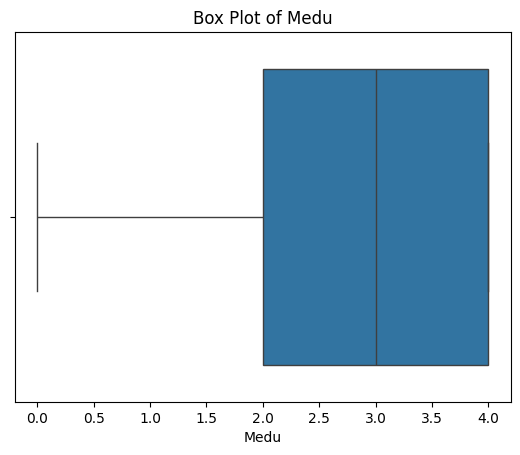

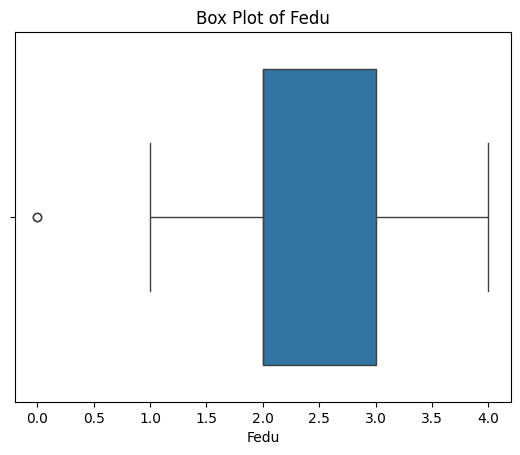

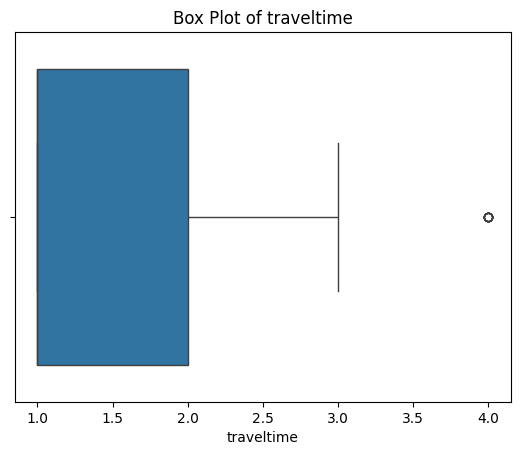

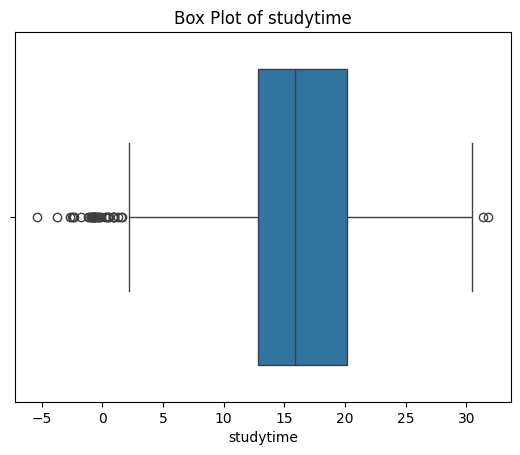

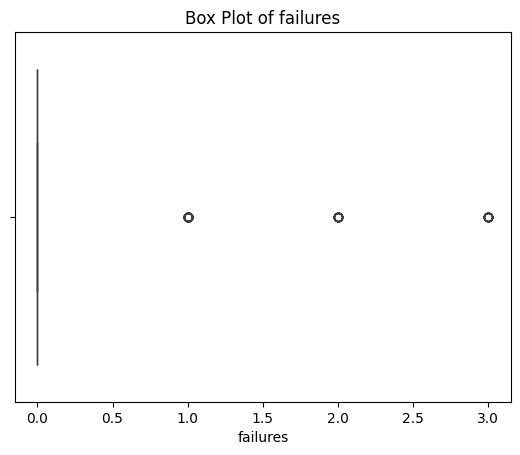

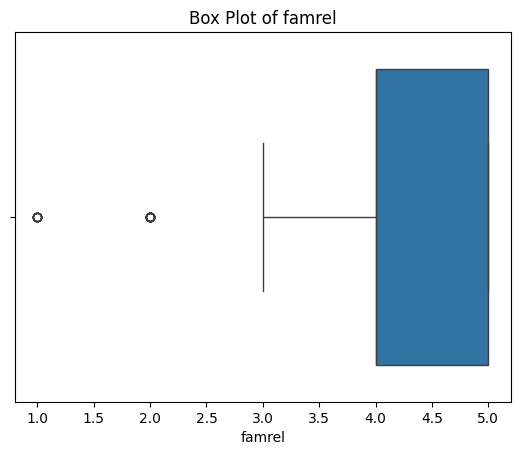

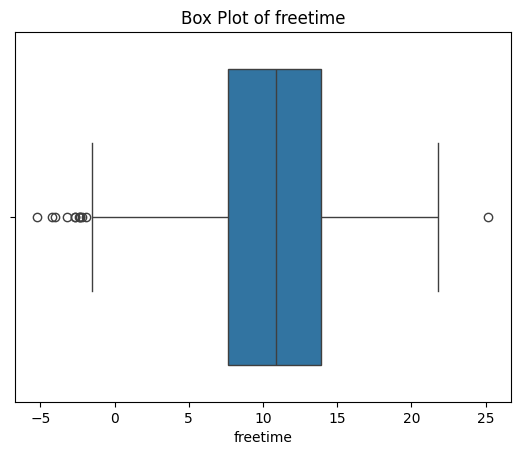

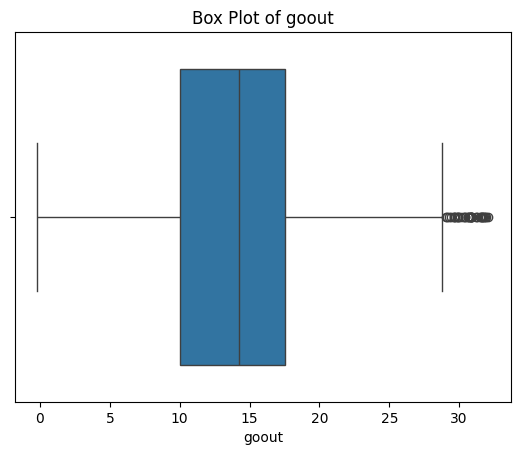

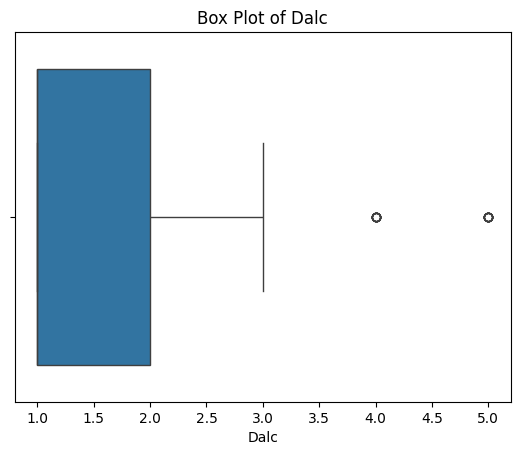

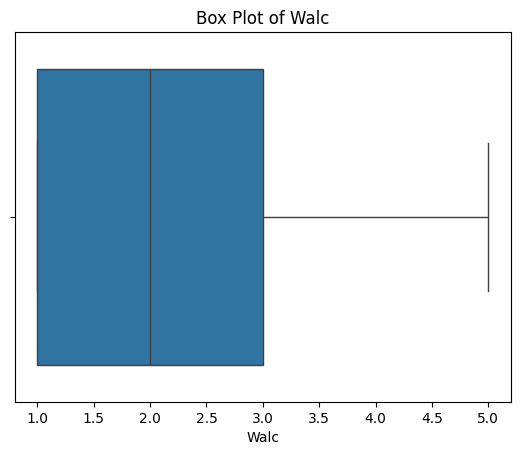

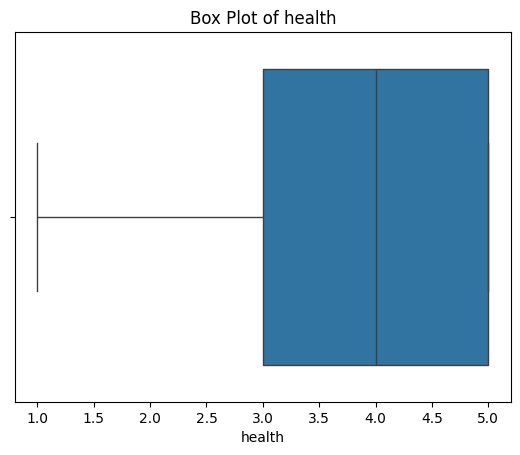

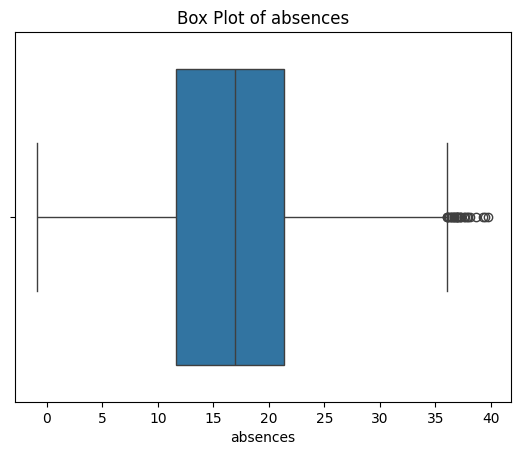

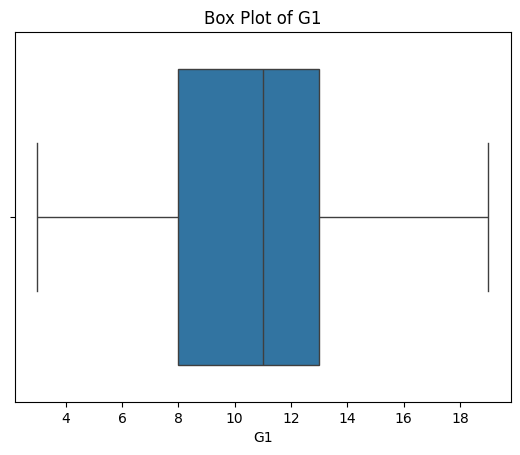

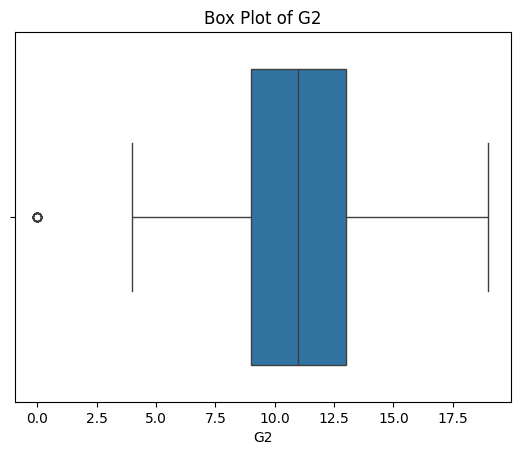

In [ ]:
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
for feature in numerical_features:
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

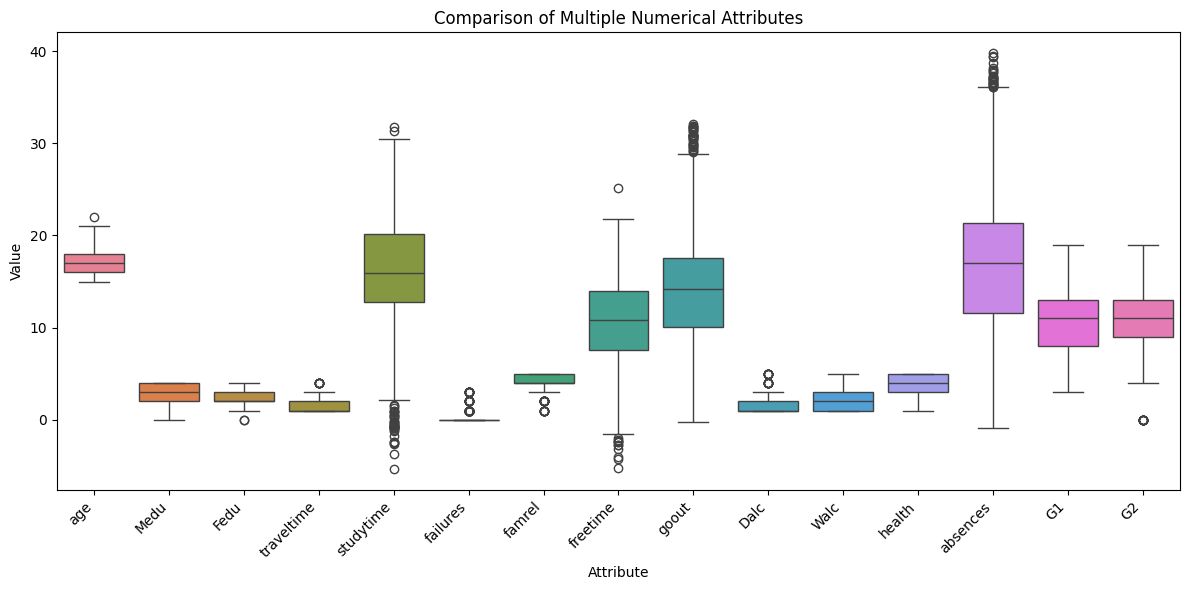

In [ ]:
# Select the columns for comparison (replace with your actual numerical features)
columns_to_compare = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

# Create a single plot for multiple box plots
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.boxplot(data=data[columns_to_compare])
plt.title('Comparison of Multiple Numerical Attributes')
plt.ylabel('Value')
plt.xlabel('Attribute')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

In [ ]:
data_no_outliers = data.drop(outlier_indices)

In [ ]:
num_rows_after_removal = data_no_outliers.shape[0]
print("Number of rows after removing outliers:", num_rows_after_removal)

Number of rows after removing outliers: 260


In [ ]:
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']  # Included 'G3' and 'failures'
correlation_matrix = data_no_outliers[numerical_features].corr()


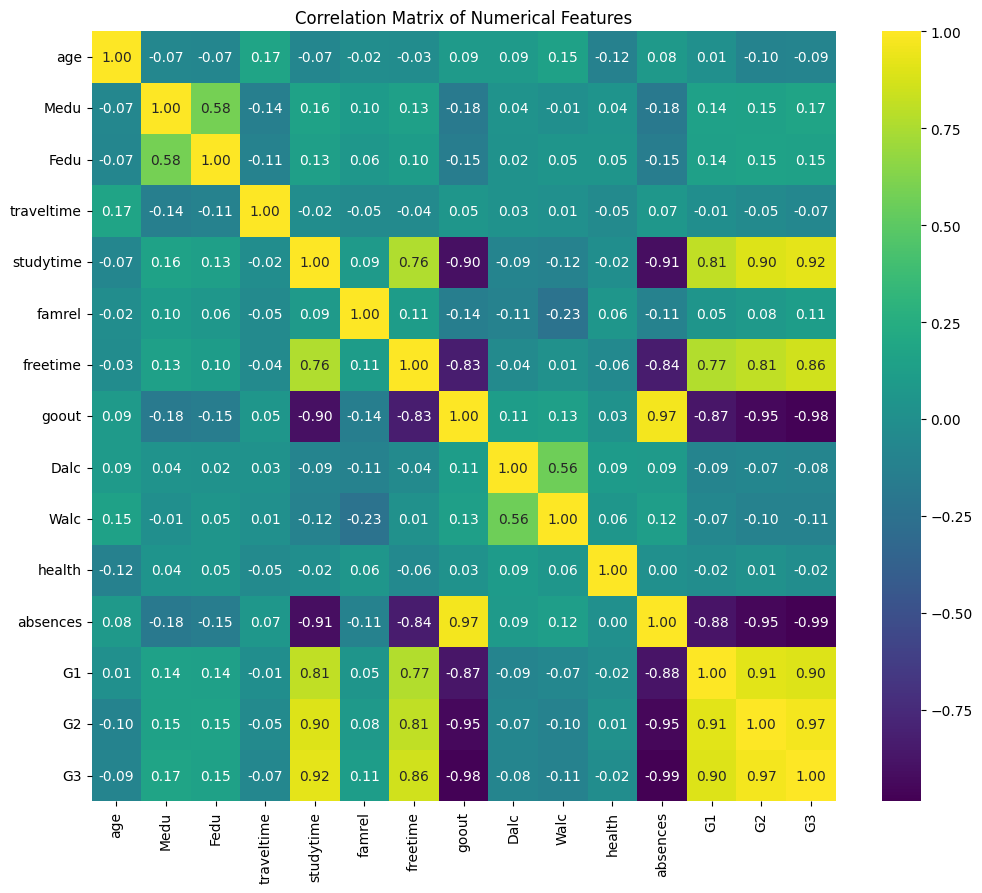

In [ ]:
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
target_correlation = correlation_matrix['G3']  # Get correlations with G3
strong_features = target_correlation[abs(target_correlation) > 0.5].index.tolist()

print("Features strongly related to G3:", strong_features)

Features strongly related to G3: ['studytime', 'freetime', 'goout', 'absences', 'G1', 'G2', 'G3']


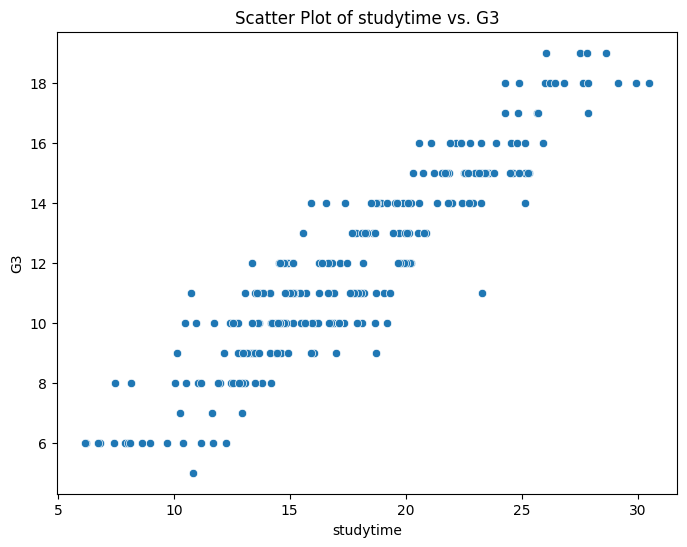

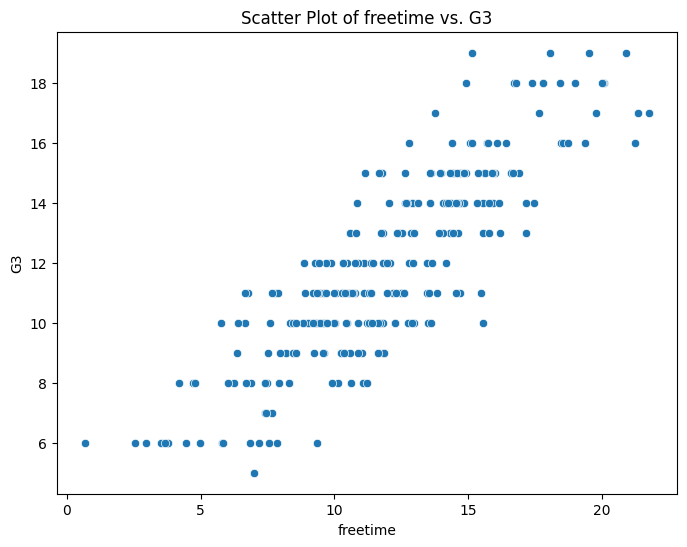

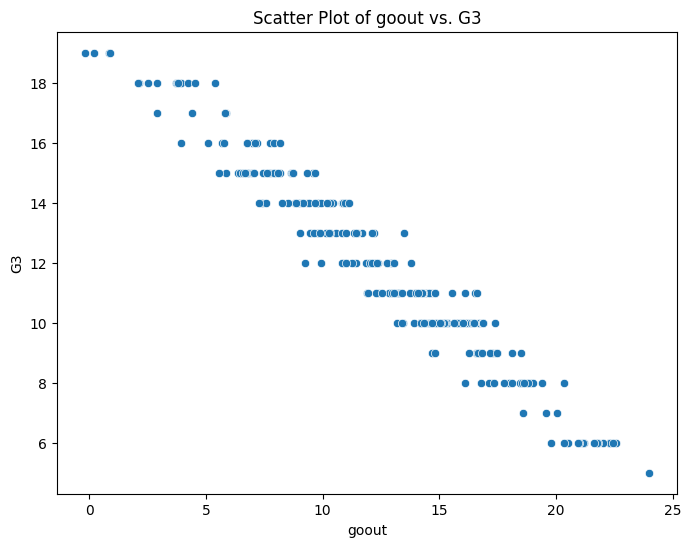

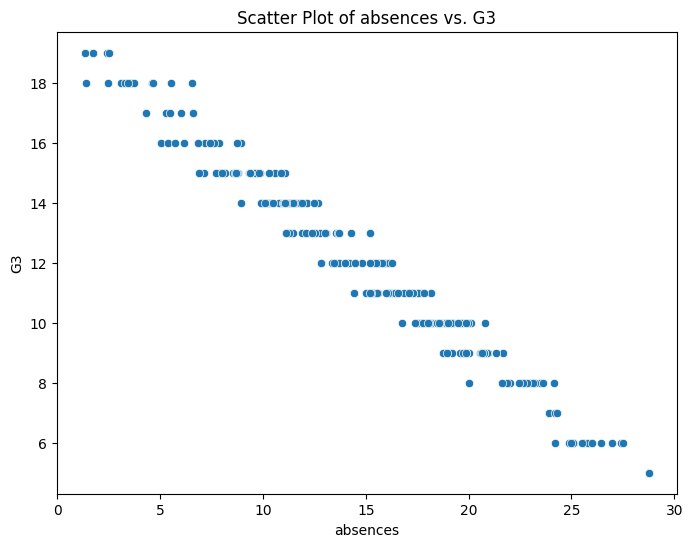

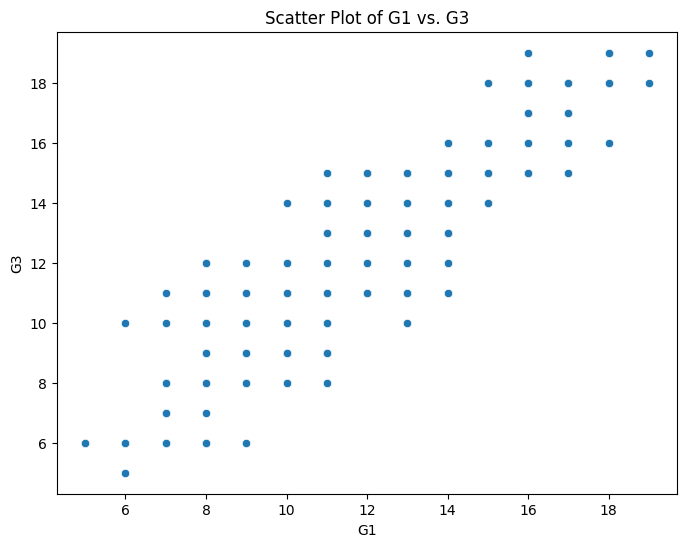

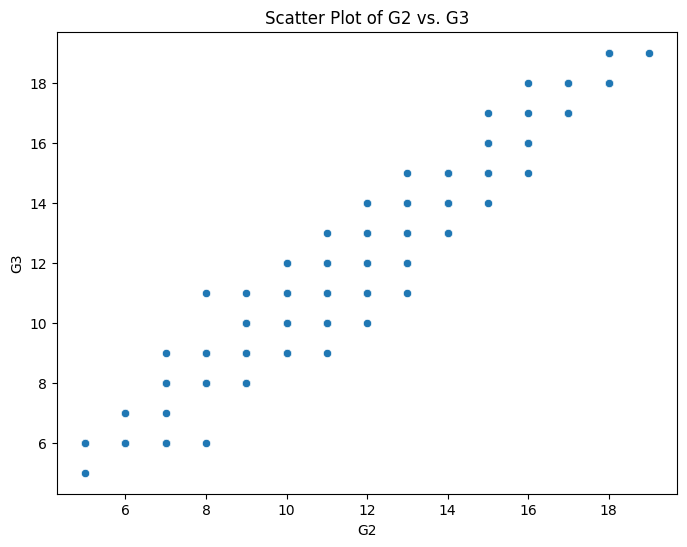

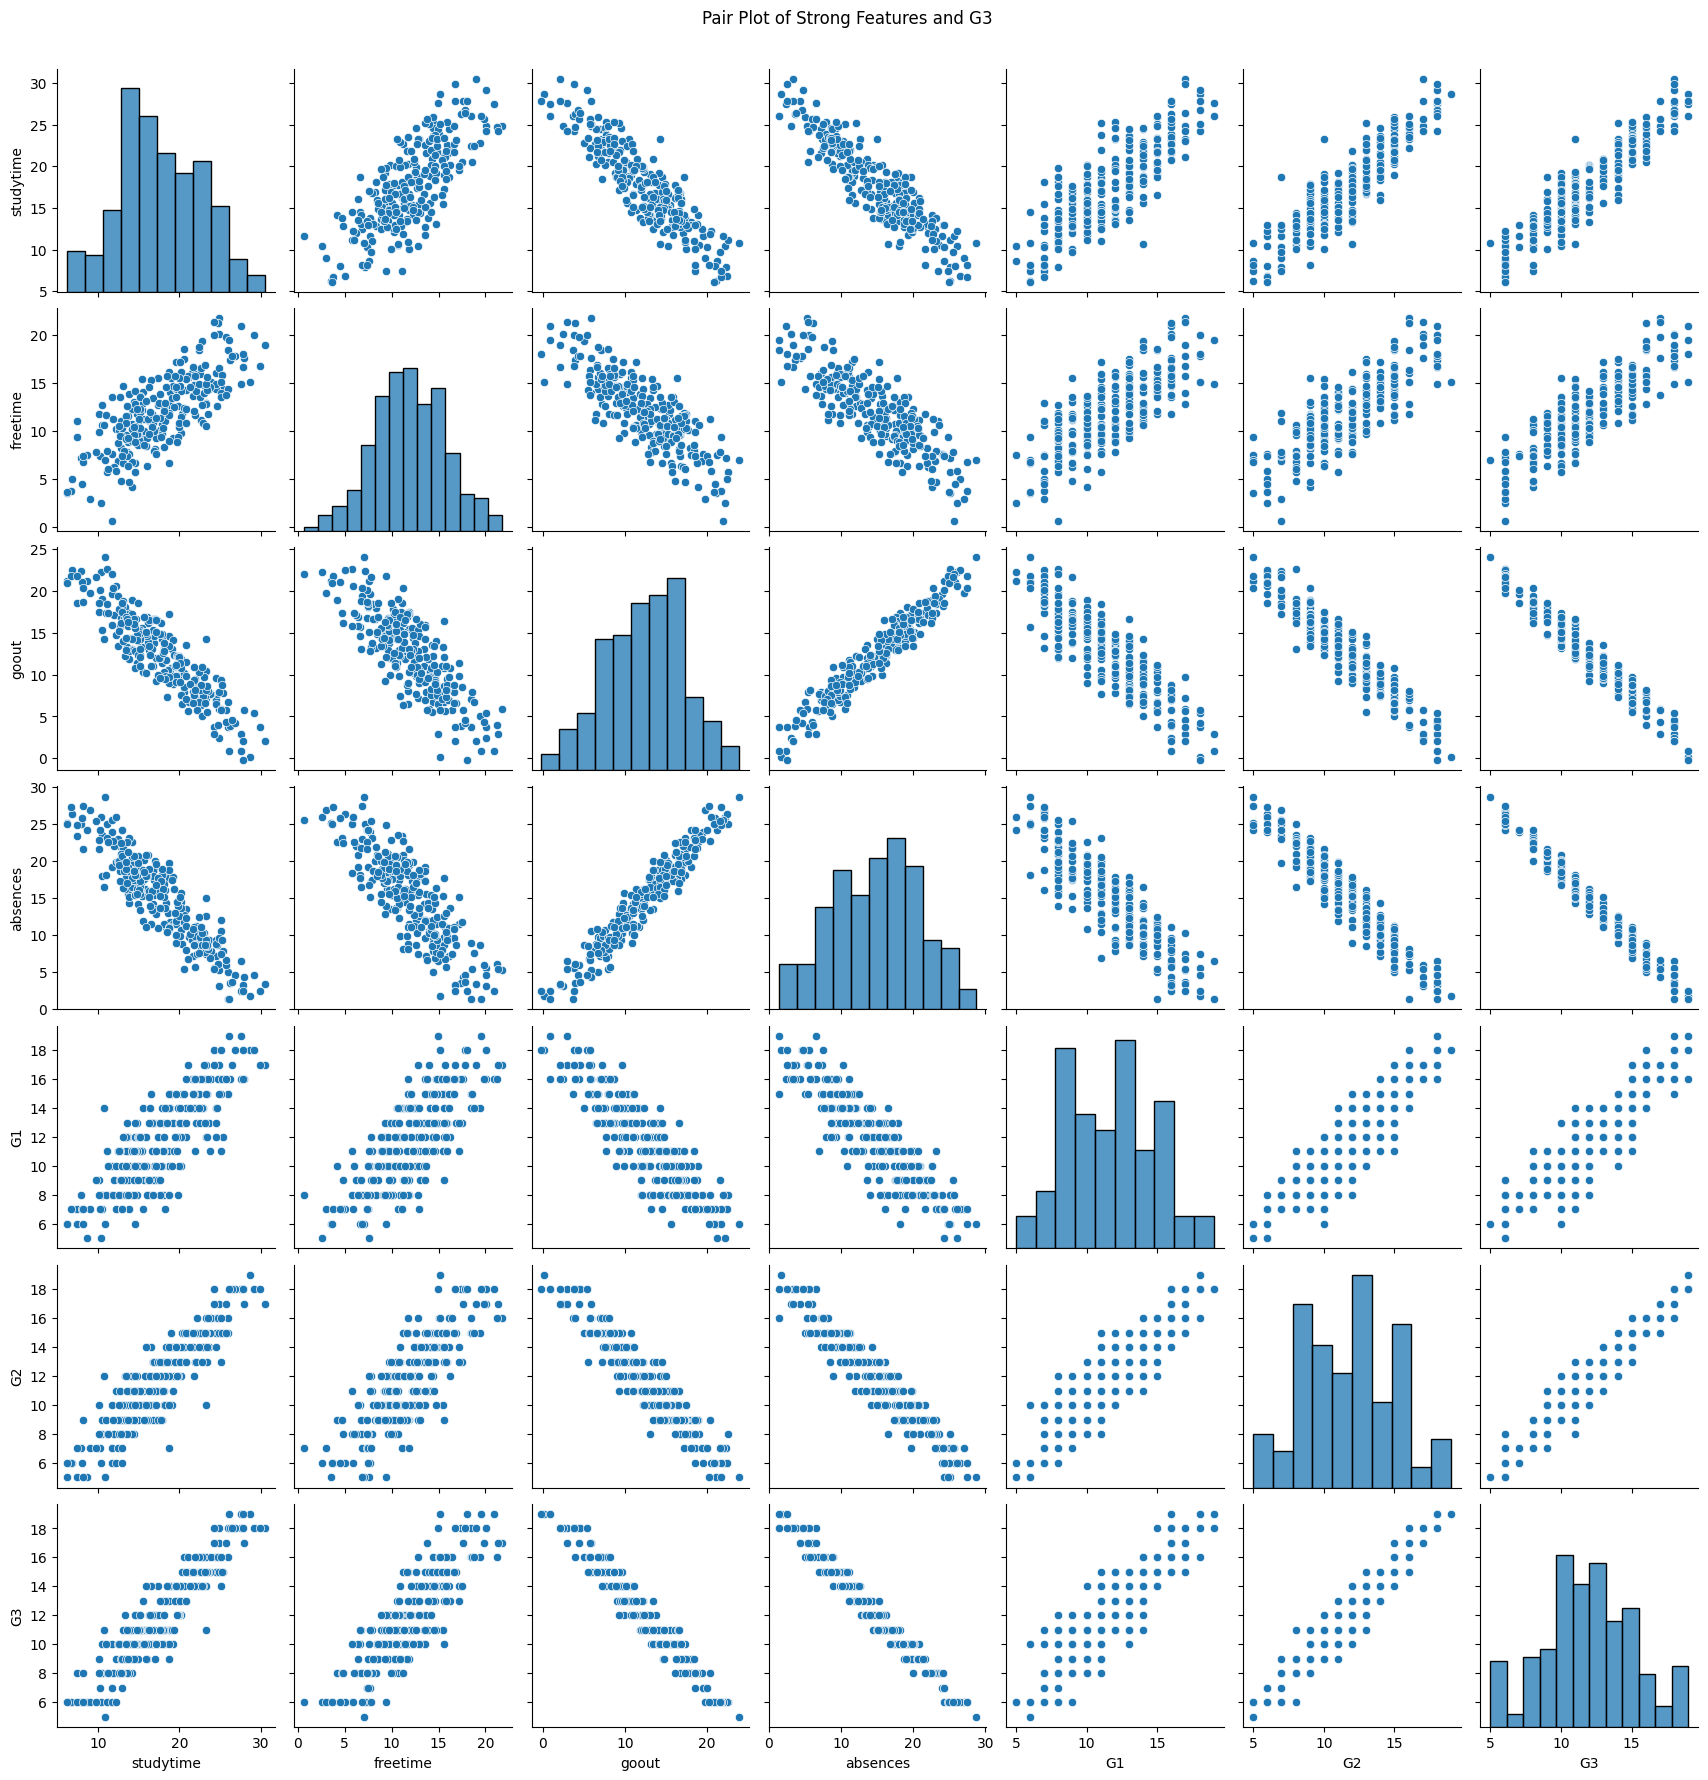

In [ ]:
strong_features = ['studytime', 'freetime', 'goout', 'absences', 'G1', 'G2', 'G3']

# Create scatter plots for each strong feature against G3
for feature in strong_features:
    if feature != 'G3':  # Avoid plotting G3 against itself
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data_no_outliers[feature], y=data_no_outliers['G3'])
        plt.title(f'Scatter Plot of {feature} vs. G3')
        plt.xlabel(feature)
        plt.ylabel('G3')
        plt.show()

# Create a pair plot to visualize relationships between all strong features
sns.pairplot(data_no_outliers[strong_features])
plt.suptitle('Pair Plot of Strong Features and G3', y=1.02)
plt.show()

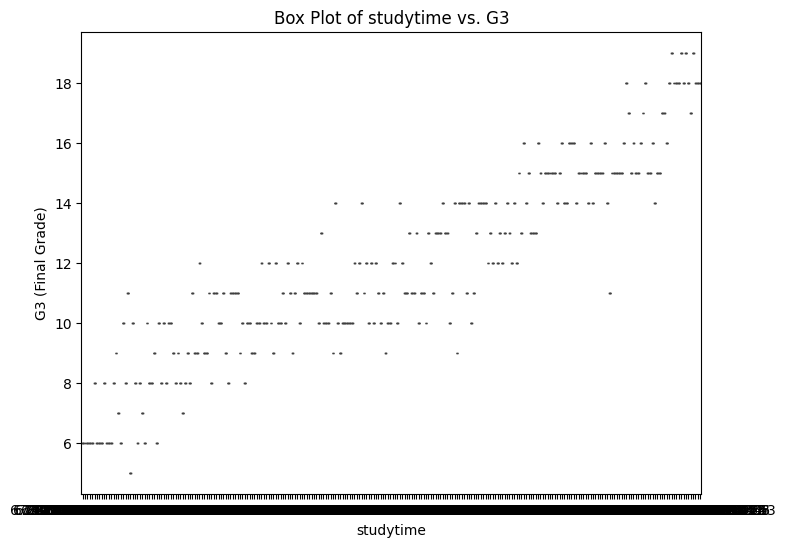

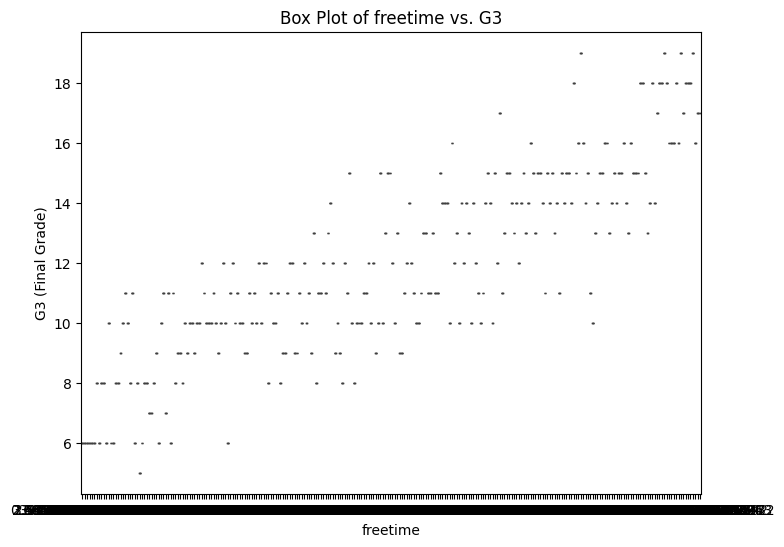

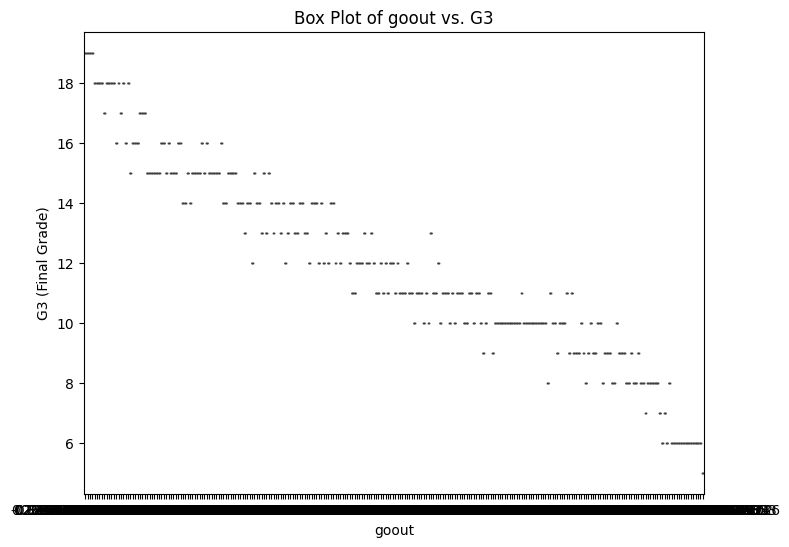

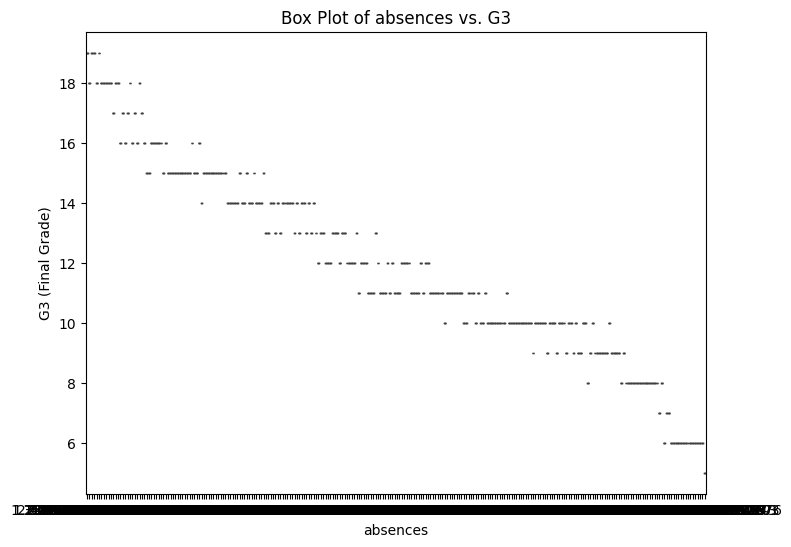

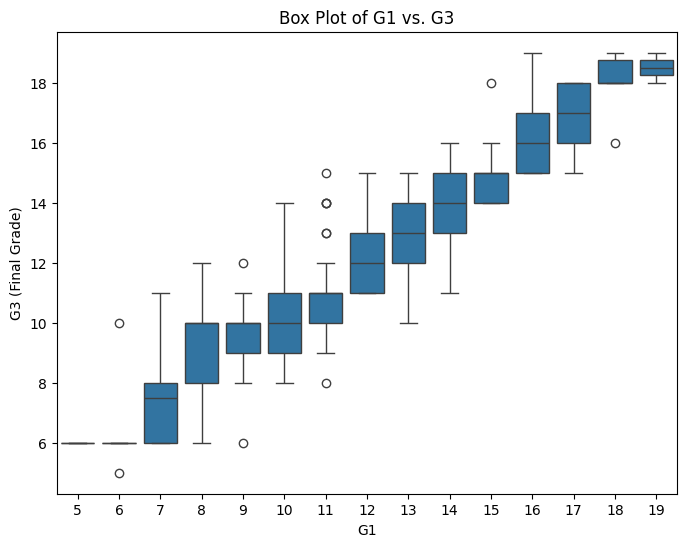

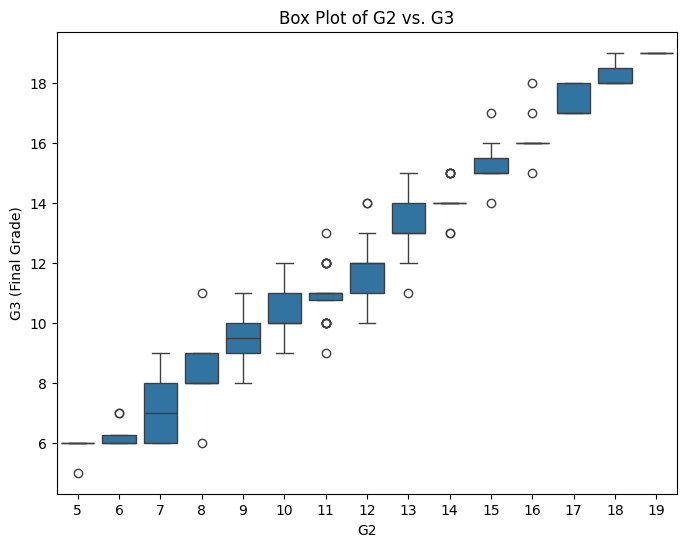

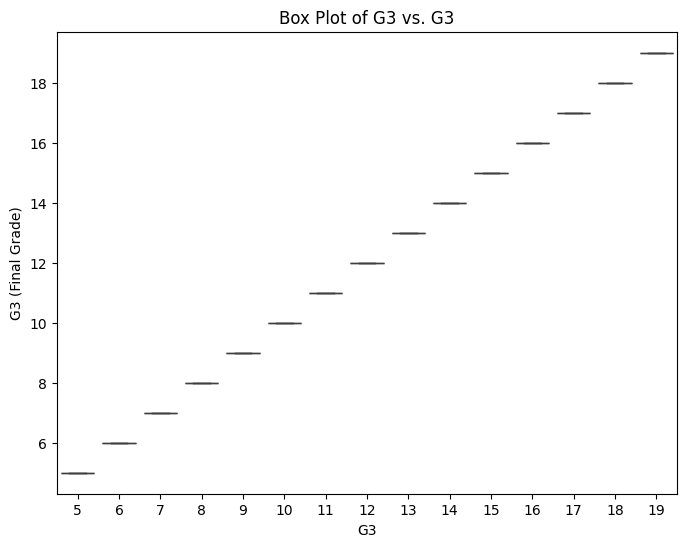

In [ ]:
for feature in strong_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data_no_outliers[feature], y=data_no_outliers['G3'])
    plt.title(f'Box Plot of {feature} vs. G3')
    plt.xlabel(feature)
    plt.ylabel('G3 (Final Grade)')
    plt.show()

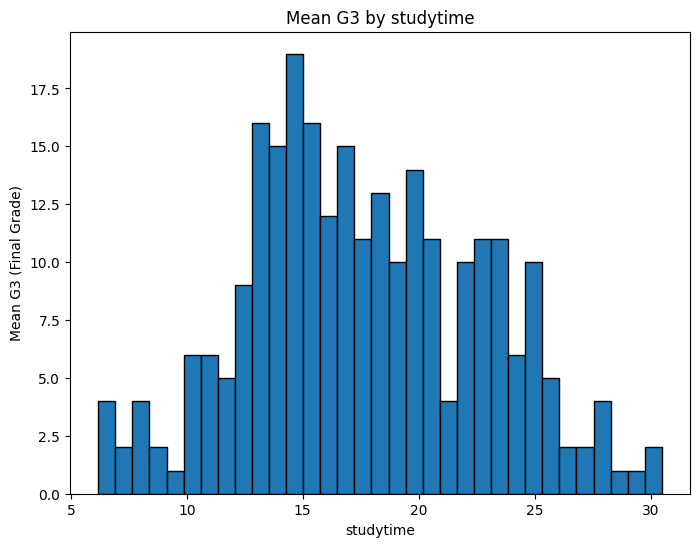

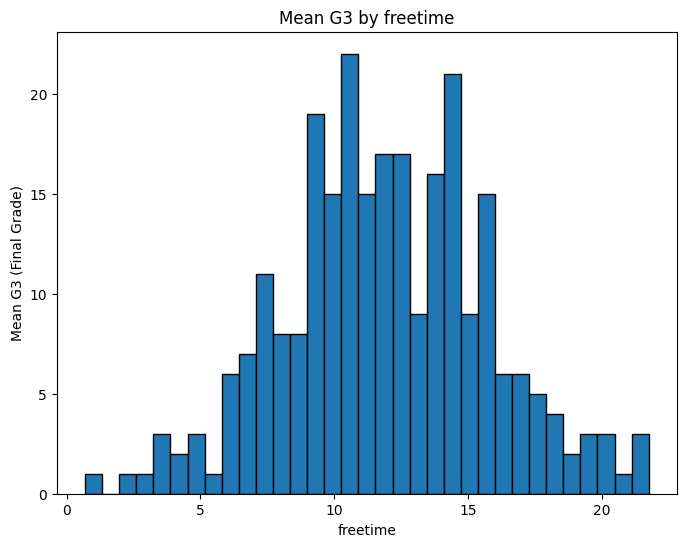

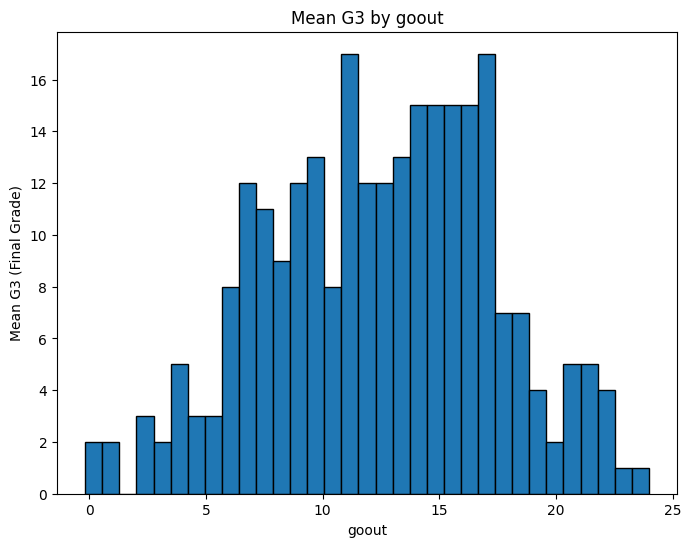

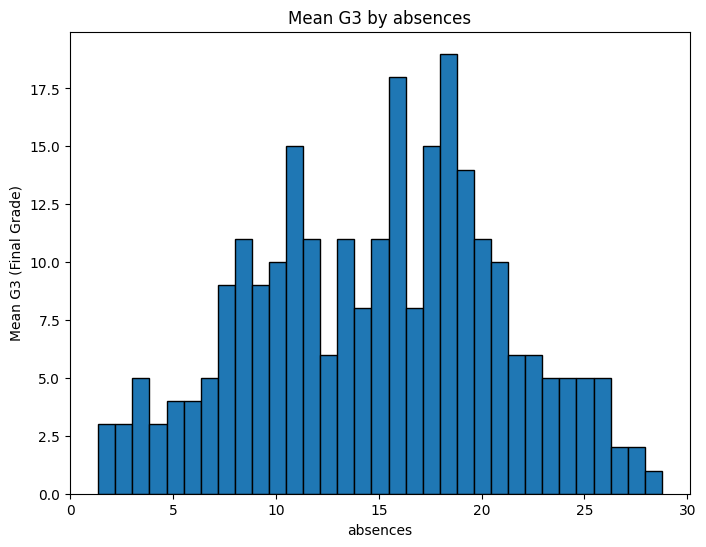

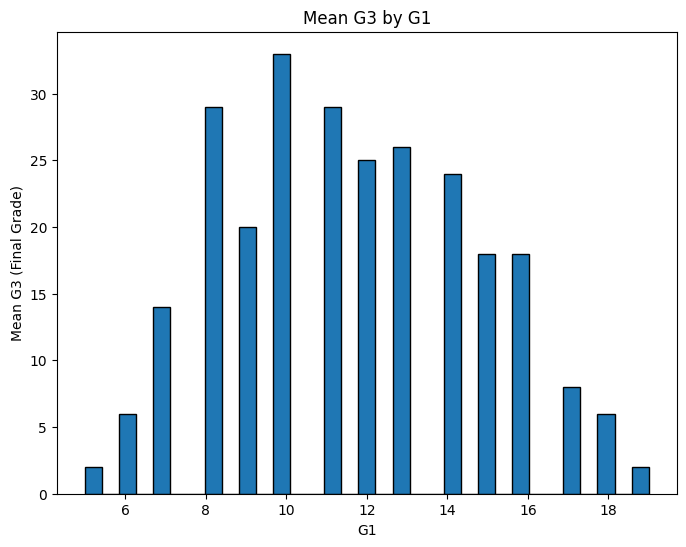

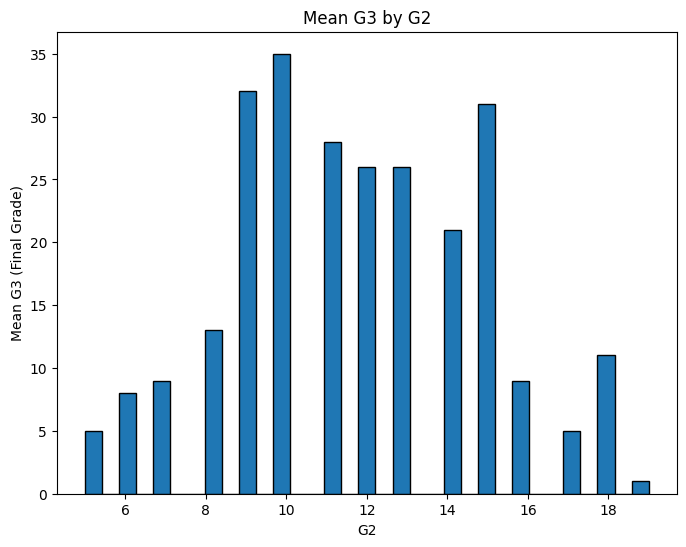

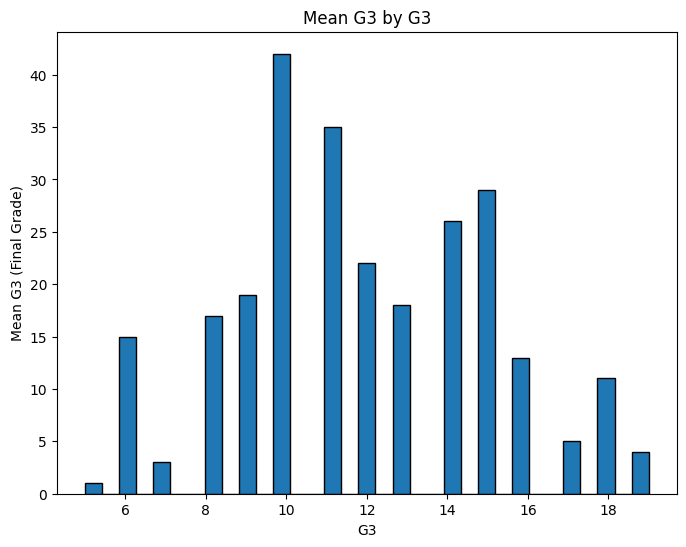

In [ ]:
for feature in strong_features:
    plt.figure(figsize=(8, 6))  # Create a new figure for each feature
    plt.hist(data_no_outliers[feature],bins=33,edgecolor='k')
    plt.title(f'Mean G3 by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Mean G3 (Final Grade)')
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
    plt.show()  # Show the plot for the current feature

In [ ]:
features = ['studytime', 'freetime', 'goout', 'absences', 'G1', 'G2']

In [ ]:
from sklearn.model_selection import train_test_split

X = data_no_outliers[features]
y = data_no_outliers['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE manually by taking the square root of MSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R-squared:", r2)
print("RMSE:", rmse)

R-squared: 0.9795400118076364
RMSE: 0.398724302611781


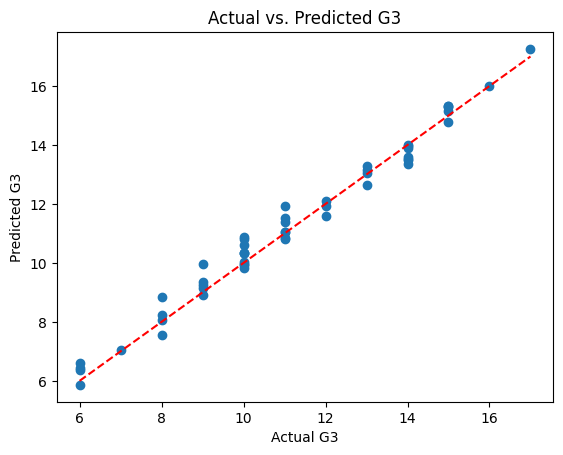

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Ideal line
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs. Predicted G3')
plt.show()